In [48]:
import yfinance as yf
import numpy as np

In [49]:
# Define the option parameters
spot_price =   171.73# Current stock price
strike_price =  60.00 # Strike price of the option
risk_free_rate = 0.052  # Risk-free interest rate
volatility = 0.16  # Volatility of the stock
time_to_maturity = 3/12  # Time to maturity in years
n_periods = 100  # Number of periods or steps in the binomial model

In [50]:
# Download historical stock price data using yfinance
stock_data = yf.download('AAPL', period="2y")
stock_prices = stock_data['Adj Close'].values

[*********************100%%**********************]  1 of 1 completed


In [51]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100
2023-10-24,173.050003,173.669998,171.449997,173.440002,173.440002,43764100
2023-10-25,171.880005,172.218994,170.830002,172.190994,172.190994,9303926


In [52]:
stock_prices.std()

16.19712909063014

In [53]:
# Calculate parameters for the binomial model
delta_t = time_to_maturity / n_periods
discount_factor = np.exp(-risk_free_rate * delta_t)
u = np.exp(volatility * np.sqrt(delta_t))
d = 1 / u
p = (np.exp(risk_free_rate * delta_t) - d) / (u - d)

In [54]:
u

1.0080320855042735

In [55]:
d

0.9920319148370605

In [56]:
delta_t

0.0025

In [57]:
# Create an array to store option values at each node
option_values = np.zeros((n_periods + 1,))

In [58]:
# Calculate option values at expiration (final step)
for i in range(n_periods + 1):
    option_values[i] = max(0, stock_prices[-1] - strike_price)

# Backward induction to calculate option values at earlier steps
for step in range(n_periods - 1, -1, -1):
    for i in range(step + 1):
        option_values[i] = discount_factor * (p * option_values[i + 1] + (1 - p) * option_values[i])

In [59]:
# The option value at the initial step (time = 0) is the option's present value
option_value = option_values[0]

In [60]:
# Print the calculated option value
print(f"The estimated European call option value is: {option_value:.2f}")

The estimated European call option value is: 110.74


In [61]:
import matplotlib.pyplot as plt

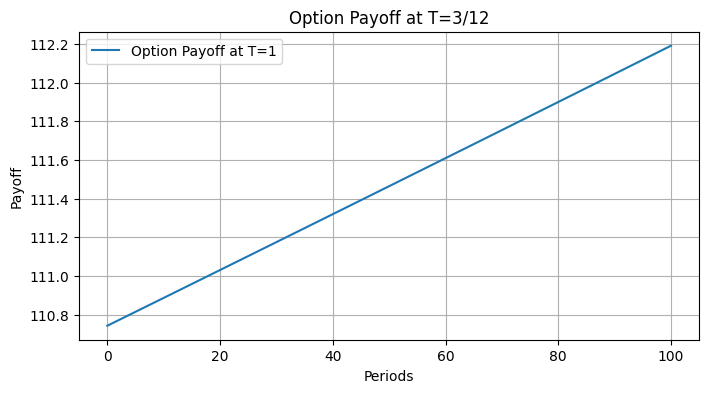

In [63]:
# Plot the option's payoff at t=1
plt.figure(figsize=(8, 4))
plt.plot(range(n_periods + 1), option_values, label='Option Payoff at T=1')
plt.xlabel('Periods')
plt.ylabel('Payoff')
plt.title('Option Payoff at T=3/12')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
